In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load and read train data
audit_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/training_set_label.csv" )
audit_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,2.72,8,1.13,0.4,0.452,0.00,0.2,0.000,1.13,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,1.852,0.4,0.5,0.3704,0
1,1.85,13,8.25,0.6,4.950,1.59,0.4,0.636,9.84,5.0,0.2,1.0,0.02,0.2,0.004,2,0.2,0.4,0,0.2,0.0,3.0,6.990,0.4,0.5,1.3980,1
2,2.72,19,2.13,0.6,1.278,0.59,0.2,0.118,2.72,5.0,0.2,1.0,0.76,0.2,0.152,2,0.2,0.4,0,0.2,0.0,2.4,2.948,0.4,0.5,0.5896,0
3,59.85,21,0.42,0.2,0.084,0.00,0.2,0.000,0.42,5.0,0.2,1.0,0.00,0.2,0.000,4,0.2,0.8,0,0.2,0.0,2.2,1.884,0.8,0.5,0.7536,0
4,2.72,4,1.33,0.4,0.532,0.35,0.2,0.070,1.68,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,2.002,0.4,0.5,0.4004,0


In [3]:
audit_data.shape

(543, 27)

In [4]:
df = audit_data.copy()

In [5]:
#drop unncessary fields
df1 = df.drop(['LOCATION_ID','Inherent_Risk','CONTROL_RISK','Detection_Risk'],axis=1)
df1.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Audit_Risk,Risk
0,2.72,1.13,0.4,0.452,0.00,0.2,0.000,1.13,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,0.3704,0
1,1.85,8.25,0.6,4.950,1.59,0.4,0.636,9.84,5.0,0.2,1.0,0.02,0.2,0.004,2,0.2,0.4,0,0.2,0.0,3.0,1.3980,1
2,2.72,2.13,0.6,1.278,0.59,0.2,0.118,2.72,5.0,0.2,1.0,0.76,0.2,0.152,2,0.2,0.4,0,0.2,0.0,2.4,0.5896,0
3,59.85,0.42,0.2,0.084,0.00,0.2,0.000,0.42,5.0,0.2,1.0,0.00,0.2,0.000,4,0.2,0.8,0,0.2,0.0,2.2,0.7536,0
4,2.72,1.33,0.4,0.532,0.35,0.2,0.070,1.68,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,0.4004,0


Here Audit risk can be calculated as:

AR = IR(Inherent risk) × CR(Control Risk) × DR(Detection Risk)

So i removed those 3 columns because AR column alone can provide a whole information 


In [6]:
df1['numbers'].value_counts()

5.0    494
5.5     33
6.0     10
6.5      5
9.0      1
Name: numbers, dtype: int64

In [7]:
df1['PROB'].value_counts()

0.2    529
0.4     13
0.6      1
Name: PROB, dtype: int64

In [8]:
df1.isnull().sum()

Sector_score     0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
TOTAL            0
numbers          0
Score_B.1        0
Risk_C           0
Money_Value      0
Score_MV         0
Risk_D           0
District_Loss    0
PROB             0
RiSk_E           0
History          0
Prob             0
Risk_F           0
Score            0
Audit_Risk       0
Risk             0
dtype: int64

In [9]:
df1.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Audit_Risk,Risk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,20.464236,2.142874,0.346593,1.162339,9.480252,0.316022,5.538131,11.615851,5.069982,0.223941,1.155617,12.441131,0.288398,7.237898,2.500921,0.205525,0.519337,0.086556,0.212891,0.044199,2.699448,5.054067,0.392265
std,24.441277,4.200770,0.173158,2.558306,22.445359,0.171442,13.509523,24.721307,0.281144,0.081145,0.549035,59.090138,0.156512,35.485800,1.214723,0.034986,0.302349,0.534651,0.058735,0.309682,0.853460,13.394958,0.488705
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,0.280000,0.000000
25%,2.370000,0.255000,0.200000,0.051000,0.000000,0.200000,0.000000,0.590000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,0.316400,0.000000
50%,3.890000,0.840000,0.200000,0.168000,0.460000,0.200000,0.092000,1.370000,5.000000,0.200000,1.000000,0.100000,0.200000,0.020000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,0.556000,0.000000
75%,55.570000,2.400000,0.600000,1.440000,4.500000,0.400000,2.184000,7.660000,5.000000,0.200000,1.000000,5.455000,0.400000,2.182000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.200000,3.032800,1.000000
max,59.850000,57.030000,0.600000,34.218000,144.390000,0.600000,86.634000,191.360000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,149.817600,1.000000


In [10]:
df1.shape

(543, 23)

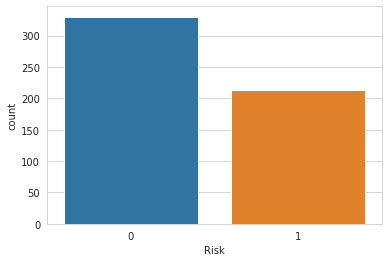

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Risk', data=df1)

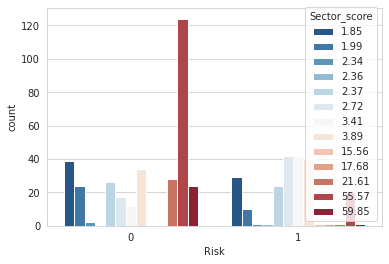

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Risk', hue='Sector_score',data=df1,palette='RdBu_r')

Plotting boxplots to check any outliers


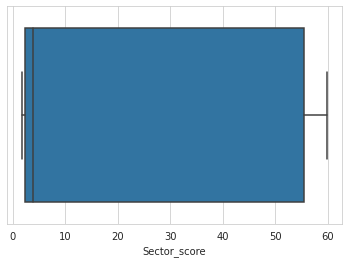

In [13]:
sns.boxplot(x='Sector_score', data=df1)

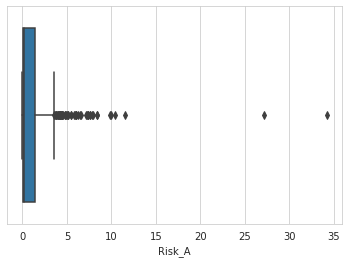

In [14]:
sns.boxplot(x='Risk_A', data=df1)

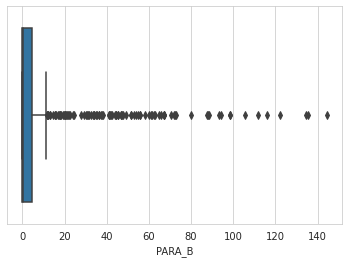

In [16]:
sns.boxplot(x='PARA_B', data=df1)

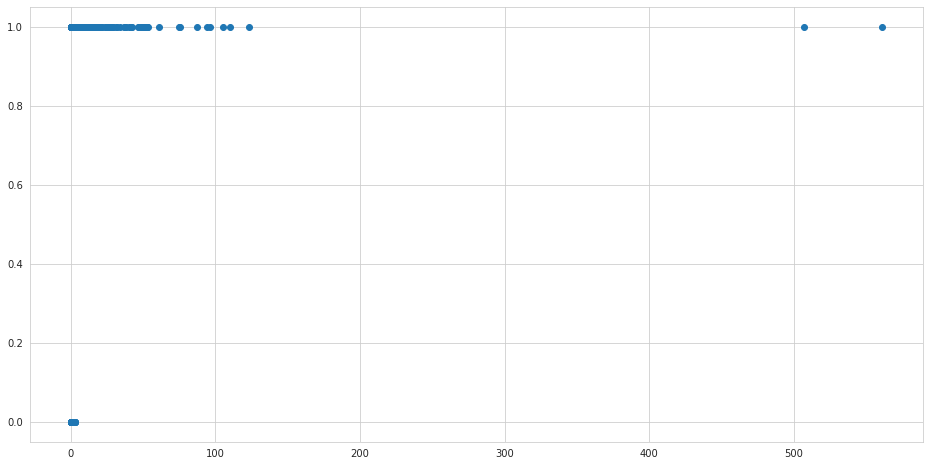

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['Risk_D'],df1['Risk'])
plt.show()

Calculating Z-score


In [18]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df1))
print(z)

[[0.72666405 0.2413386  0.30871335 ... 0.58574257 0.34998135 0.80340186]
 [0.7622924  1.45515157 1.4647916  ... 0.35248226 0.27319518 1.2447071 ]
 [0.72666405 0.00306751 1.4647916  ... 0.35118637 0.3336019  0.80340186]
 ...
 [1.43765544 0.4367209  0.84736491 ... 0.82029878 0.35580533 0.80340186]
 [0.7565591  0.38430126 0.84736491 ... 0.82029878 0.34818798 0.80340186]
 [0.72666405 0.51058494 0.84736491 ... 0.82029878 0.35673639 0.80340186]]


In [19]:
threshold = 3
print(np.where(z > 3))

(array([  8,   8,   8,  44,  44,  44,  44,  44,  44,  44,  44,  46,  46,
        46,  47,  47,  47,  47,  61,  62,  62,  65,  65,  65,  68,  68,
        70,  70,  70,  70,  70,  70,  75,  75,  75,  75,  75,  75,  75,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  93,  93,  93,  98,
        98,  98, 101, 101, 101, 110, 116, 116, 116, 116, 120, 120, 120,
       120, 120, 120, 120, 130, 130, 130, 151, 151, 158, 162, 162, 179,
       184, 184, 184, 196, 196, 196, 196, 199, 199, 199, 200, 200, 200,
       209, 211, 225, 225, 225, 234, 234, 234, 248, 248, 248, 248, 248,
       248, 248, 249, 249, 249, 253, 253, 253, 272, 272, 273, 273, 273,
       289, 289, 289, 289, 290, 290, 290, 291, 291, 313, 313, 313, 322,
       322, 322, 323, 323, 323, 327, 327, 327, 334, 337, 337, 337, 337,
       337, 337, 340, 353, 353, 354, 363, 363, 363, 375, 375, 394, 394,
       394, 399, 401, 401, 401, 401, 401, 401, 401, 416, 424, 429, 429,
       439, 441, 441, 441, 442, 446, 448, 453, 453, 465, 465, 4

In [20]:
z[8][8]

3.3110305283388173

IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

In [21]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sector_score     53.2000
PARA_A            2.1450
Score_A           0.4000
Risk_A            1.3890
PARA_B            4.5000
Score_B           0.2000
Risk_B            2.1840
TOTAL             7.0700
numbers           0.0000
Score_B.1         0.0000
Risk_C            0.0000
Money_Value       5.4550
Score_MV          0.2000
Risk_D            2.1820
District_Loss     0.0000
PROB              0.0000
RiSk_E            0.0000
History           0.0000
Prob              0.0000
Risk_F            0.0000
Score             1.2000
Audit_Risk        2.7164
Risk              1.0000
dtype: float64


In [22]:
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR) 

In [23]:
lower_bound

Sector_score    -77.4300
PARA_A           -2.9625
Score_A          -0.4000
Risk_A           -2.0325
PARA_B           -6.7500
Score_B          -0.1000
Risk_B           -3.2760
TOTAL           -10.0150
numbers           5.0000
Score_B.1         0.2000
Risk_C            1.0000
Money_Value      -8.1825
Score_MV         -0.1000
Risk_D           -3.2730
District_Loss     2.0000
PROB              0.2000
RiSk_E            0.4000
History           0.0000
Prob              0.2000
Risk_F            0.0000
Score             0.2000
Audit_Risk       -3.7582
Risk             -1.5000
dtype: float64

In [24]:
upper_bound

Sector_score     135.3700
PARA_A             5.6175
Score_A            1.2000
Risk_A             3.5235
PARA_B            11.2500
Score_B            0.7000
Risk_B             5.4600
TOTAL             18.2650
numbers            5.0000
Score_B.1          0.2000
Risk_C             1.0000
Money_Value       13.6375
Score_MV           0.7000
Risk_D             5.4550
District_Loss      2.0000
PROB               0.2000
RiSk_E             0.4000
History            0.0000
Prob               0.2000
Risk_F             0.0000
Score              5.0000
Audit_Risk         7.1074
Risk               2.5000
dtype: float64

In [25]:
(df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Audit_Risk,Risk
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
539,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
540,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Below code will remove outliers based on calculated IQR Score

In [27]:
df1_iqr = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1_iqr.shape

(325, 23)

In [28]:
df1.shape   # orignal data shape

(543, 23)

Below code will remove outliers based on calculated Z-Score

In [29]:
df2 = df1[(z < 3).all(axis=1)]

In [30]:
df2.shape

(477, 23)

In [31]:
df2.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Audit_Risk,Risk
0,2.72,1.13,0.4,0.452,0.00,0.2,0.000,1.13,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,0.3704,0
1,1.85,8.25,0.6,4.950,1.59,0.4,0.636,9.84,5.0,0.2,1.0,0.02,0.2,0.004,2,0.2,0.4,0,0.2,0.0,3.0,1.3980,1
2,2.72,2.13,0.6,1.278,0.59,0.2,0.118,2.72,5.0,0.2,1.0,0.76,0.2,0.152,2,0.2,0.4,0,0.2,0.0,2.4,0.5896,0
3,59.85,0.42,0.2,0.084,0.00,0.2,0.000,0.42,5.0,0.2,1.0,0.00,0.2,0.000,4,0.2,0.8,0,0.2,0.0,2.2,0.7536,0
4,2.72,1.33,0.4,0.532,0.35,0.2,0.070,1.68,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,0.4004,0


I am considering IQR data from here onwards

In [32]:
df3 = df1_iqr.copy()
df3.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Audit_Risk,Risk
0,2.72,1.13,0.4,0.452,0.0000,0.2,0.0000,1.1300,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,0.3704,0
2,2.72,2.13,0.6,1.278,0.5900,0.2,0.1180,2.7200,5.0,0.2,1.0,0.76,0.2,0.152,2,0.2,0.4,0,0.2,0.0,2.4,0.5896,0
4,2.72,1.33,0.4,0.532,0.3500,0.2,0.0700,1.6800,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,0.4004,0
5,21.61,0.59,0.2,0.118,0.6900,0.2,0.1380,1.2800,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,0.3312,0
6,55.57,0.40,0.2,0.080,0.0025,0.2,0.0005,0.4025,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,0.2961,0


In [33]:
df3.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Audit_Risk', 'Risk'],
      dtype='object')

In [34]:
#Normalization 
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(df3)

# transform training data
df3_norm = norm.transform(df3)

In [35]:
df3_norm.shape

(325, 23)

In [36]:
train = pd.DataFrame(df3_norm, columns= ['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Audit_Risk', 'Risk'])
train.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Audit_Risk,Risk
0,0.015000,0.217308,0.5,0.144872,0.000000,0.0,0.000000,0.078039,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.056613,0.0
1,0.015000,0.409615,1.0,0.409615,0.054378,0.0,0.023165,0.187845,0.0,0.0,0.0,0.080423,0.0,0.040212,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.193888,0.0
2,0.015000,0.255769,0.5,0.170513,0.032258,0.0,0.013742,0.116022,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.075401,0.0
3,0.340690,0.113462,0.0,0.037821,0.063594,0.0,0.027091,0.088398,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.032064,0.0
4,0.926207,0.076923,0.0,0.025641,0.000230,0.0,0.000098,0.027797,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010083,0.0


In [144]:
X=train.drop(['Risk'],axis=1)
y=train['Risk'].astype(int)

In [145]:
y

0      0
1      0
2      0
3      0
4      0
      ..
320    0
321    0
322    0
323    0
324    0
Name: Risk, Length: 325, dtype: int64

In [146]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [147]:
# import Logistic Regression from sklearn.linear_model

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
predictions = log_model.predict(X_test)

In [149]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, predictions))

F1 Score:  1.0


In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
predictions1 = rfc.predict(X_test)

In [44]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, predictions1))

F1 Score:  1.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


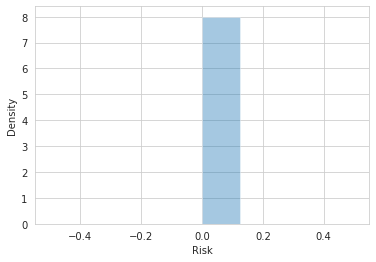

In [46]:
sns.distplot(y_test - predictions)

In [68]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/testing_set_label.csv')
test_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,22,0.00,0.2,0.000,18.05,0.6,10.830,18.05,5.0,0.2,1.0,2.29,0.2,0.458,2,0.2,0.4,0,0.2,0.0,3.2,12.688,0.4,0.5,2.5376
1,55.57,29,1.26,0.4,0.504,1.58,0.4,0.632,2.84,5.0,0.2,1.0,6.50,0.4,2.600,2,0.2,0.4,0,0.2,0.0,3.0,5.136,0.4,0.5,1.0272
2,2.72,16,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,1.0,0.00,0.2,0.000,4,0.2,0.8,0,0.2,0.0,2.2,1.800,0.8,0.5,0.7200
3,59.85,4,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800
4,3.41,16,11.73,0.6,7.038,85.87,0.6,51.522,97.60,5.0,0.2,1.0,6.96,0.4,2.784,2,0.2,0.4,1,0.4,0.4,4.0,63.144,0.8,0.5,25.2576


In [69]:
test_data.shape

(233, 26)

In [70]:
test_data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [71]:
test_data1 = test_data.dropna()

In [72]:
test_data1.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [73]:
test_data_new = test_data1.copy()
test_data_new.shape

(232, 26)

In [74]:
test_data_new1 = test_data_new.drop(['LOCATION_ID','CONTROL_RISK','Inherent_Risk','Detection_Risk'], axis=1)
test_data_new1.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Audit_Risk
0,3.89,0.00,0.2,0.000,18.05,0.6,10.830,18.05,5.0,0.2,1.0,2.29,0.2,0.458,2,0.2,0.4,0,0.2,0.0,3.2,2.5376
1,55.57,1.26,0.4,0.504,1.58,0.4,0.632,2.84,5.0,0.2,1.0,6.50,0.4,2.600,2,0.2,0.4,0,0.2,0.0,3.0,1.0272
2,2.72,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,1.0,0.00,0.2,0.000,4,0.2,0.8,0,0.2,0.0,2.2,0.7200
3,59.85,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,0.2800
4,3.41,11.73,0.6,7.038,85.87,0.6,51.522,97.60,5.0,0.2,1.0,6.96,0.4,2.784,2,0.2,0.4,1,0.4,0.4,4.0,25.2576


In [75]:
test_data_new1.shape

(232, 22)

In [76]:
Q1 = test_data_new1.quantile(0.25)
Q3 = test_data_new1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sector_score     53.2000
PARA_A            2.8000
Score_A           0.4000
Risk_A            1.7320
PARA_B            2.6150
Score_B           0.2000
Risk_B            0.8565
TOTAL             7.6800
numbers           0.0000
Score_B.1         0.0000
Risk_C            0.0000
Money_Value       6.3575
Score_MV          0.2000
Risk_D            2.5430
District_Loss     0.0000
PROB              0.0000
RiSk_E            0.0000
History           0.0000
Prob              0.0000
Risk_F            0.0000
Score             1.4000
Audit_Risk        3.0060
dtype: float64


In [77]:
lower_bound_test = Q1 -(1.5 * IQR) 
upper_bound_test = Q3 +(1.5 * IQR)

In [78]:
lower_bound_test

Sector_score    -77.43000
PARA_A           -4.07000
Score_A          -0.40000
Risk_A           -2.57200
PARA_B           -3.92250
Score_B          -0.10000
Risk_B           -1.28475
TOTAL           -11.06250
numbers           5.00000
Score_B.1         0.20000
Risk_C            1.00000
Money_Value      -9.53625
Score_MV         -0.10000
Risk_D           -3.81450
District_Loss     2.00000
PROB              0.20000
RiSk_E            0.40000
History           0.00000
Prob              0.20000
Risk_F            0.00000
Score            -0.10000
Audit_Risk       -4.19190
dtype: float64

In [79]:
upper_bound_test

Sector_score     135.37000
PARA_A             7.13000
Score_A            1.20000
Risk_A             4.35600
PARA_B             6.53750
Score_B            0.70000
Risk_B             2.14125
TOTAL             19.65750
numbers            5.00000
Score_B.1          0.20000
Risk_C             1.00000
Money_Value       15.89375
Score_MV           0.70000
Risk_D             6.35750
District_Loss      2.00000
PROB               0.20000
RiSk_E             0.40000
History            0.00000
Prob               0.20000
Risk_F             0.00000
Score              5.50000
Audit_Risk         7.83210
dtype: float64

In [80]:
(test_data_new1 < (Q1 - 1.5 * IQR)) |(test_data_new1 > (Q3 + 1.5 * IQR))

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Audit_Risk
0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
230,False,False,False,False,True,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True
231,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False


In [81]:
test_iqr = test_data_new1[~((test_data_new1 < (Q1 - 1.5 * IQR)) |(test_data_new1 > (Q3 + 1.5 * IQR))).any(axis=1)]
test_iqr.shape

(137, 22)

In [82]:
test_data_new1.shape  #original test

(232, 22)

In [83]:
test_iqr_1 = test_iqr.copy()

In [84]:
test_iqr_1.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Audit_Risk'],
      dtype='object')

In [85]:
#Normalization 
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(test_iqr_1)

# transform training data
test_norm = norm.transform(test_iqr_1)

In [86]:
test_modified = pd.DataFrame(test_norm, columns=['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Audit_Risk'])
test_modified.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Audit_Risk
0,0.926207,0.179743,0.5,0.119829,0.301527,0.5,0.298395,0.348039,0.0,0.0,0.0,0.625000,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.555556,0.481940
1,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.926207,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001923,0.0,0.000641,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000516
3,0.340690,0.094151,0.0,0.031384,0.154580,0.0,0.076487,0.180147,0.0,0.0,0.0,0.002885,0.0,0.000962,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.038700
4,0.002414,0.156919,0.5,0.104612,0.000000,0.0,0.000000,0.134804,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.056760


In [99]:
test_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   137 non-null    float64
 1   PARA_A         137 non-null    float64
 2   Score_A        137 non-null    float64
 3   Risk_A         137 non-null    float64
 4   PARA_B         137 non-null    float64
 5   Score_B        137 non-null    float64
 6   Risk_B         137 non-null    float64
 7   TOTAL          137 non-null    float64
 8   numbers        137 non-null    float64
 9   Score_B.1      137 non-null    float64
 10  Risk_C         137 non-null    float64
 11  Money_Value    137 non-null    float64
 12  Score_MV       137 non-null    float64
 13  Risk_D         137 non-null    float64
 14  District_Loss  137 non-null    float64
 15  PROB           137 non-null    float64
 16  RiSk_E         137 non-null    float64
 17  History        137 non-null    float64
 18  Prob      

In [150]:
Risk = log_model.predict(test_modified)

In [151]:
Risk

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [153]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(Risk) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_modified.index # its important for comparison. Here "test_new" is your new test dataset
#res.columns = ['prediction']

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv',index=False,header=['prediction'])         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Index(['prediction'], dtype='object')